In [2]:
import pandas as pd

raw_data = pd.read_csv("CDC_Salmonella_Data.csv")
raw_data

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN
5,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,7,0.0,0.0,"salad, unspecified",NaN
6,2009,2,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,5,0.0,0.0,NaN,NaN
7,2009,2,Minnesota,Norovirus Genogroup II,NaN,Suspected,Restaurant - other or unknown type,22,1.0,0.0,mushrooms; pasta salad; fruit,NaN
8,2009,2,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,16,0.0,0.0,vegetables,NaN
9,2009,2,Minnesota,Campylobacter jejuni,NaN,Confirmed,Restaurant - other or unknown type,11,2.0,0.0,"lettuce, unspecified",NaN


In [3]:
raw_data.describe()

,Year,Month,Illnesses,Hospitalizations,Deaths
count,19986.000000,19986.000000,19986.000000,16340.000000,16374.000000
mean,2006.010107,6.431502,19.402982,0.952387,0.022047
std,5.467753,3.435460,48.622583,5.250625,0.380223
min,1998.000000,1.000000,2.000000,0.000000,0.000000
25%,2001.000000,4.000000,3.000000,0.000000,0.000000
50%,2005.000000,6.000000,8.000000,0.000000,0.000000
75%,2011.000000,9.000000,19.000000,1.000000,0.000000
max,2016.000000,12.000000,1939.000000,308.000000,33.000000


In [4]:
genus = raw_data[raw_data['Genus Species'] == "Norovirus"]
genus.head()

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN


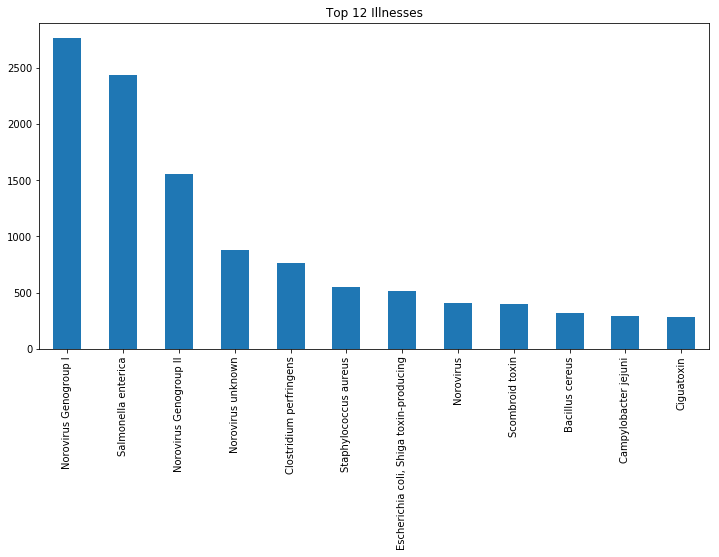

In [5]:
%matplotlib inline

#plot graph
x = raw_data['Genus Species'].value_counts()
x[x>200].plot(kind = 'bar', title = "Top 12 Illnesses", figsize = (12,6))


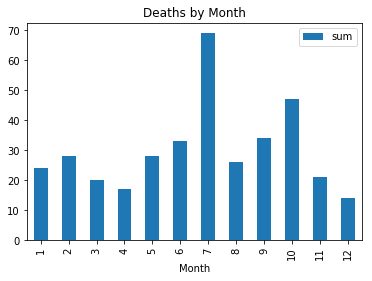

In [6]:
death_count = raw_data.groupby('Month').agg(['sum'])
death_count['Deaths'].plot(kind = 'bar', title = 'Deaths by Month')

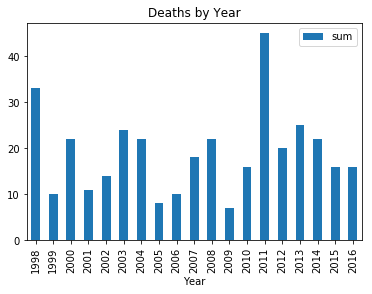

In [7]:
death_count = raw_data.groupby('Year').agg(['sum'])
death_count['Deaths'].plot(kind = 'bar', title = 'Deaths by Year')

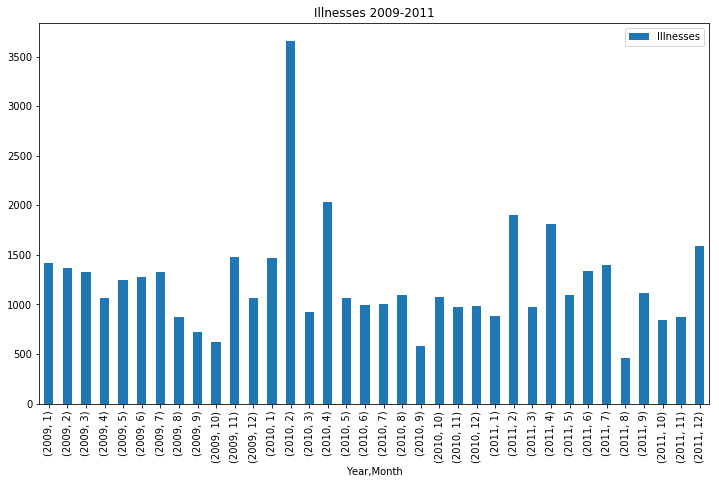

In [67]:
ill_count = raw_data.groupby(['Year','Month'], as_index = False).agg(sum)
ill_count = ill_count[(ill_count.Year>2008) & (ill_count.Year<2012)]
ill_count
ill_count.plot(x = ['Year','Month'], y = 'Illnesses',kind = 'bar', title = 'Illnesses 2009-2011', figsize = (12,7))


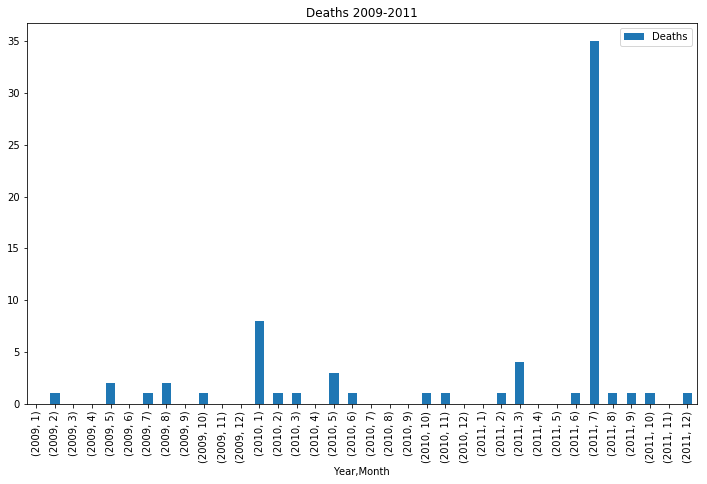

In [65]:
ill_count.plot(x = ['Year','Month'], y = 'Deaths',kind = 'bar', title = 'Deaths 2009-2011', figsize = (12,7))